In [2]:
import pandas as pd

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv('ml5/train.csv', delimiter=';', index_col='id')

In [10]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [14]:
data['age_year'] = data['age']/365

In [15]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [16]:
data['age_year'].describe()

count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age_year, dtype: float64

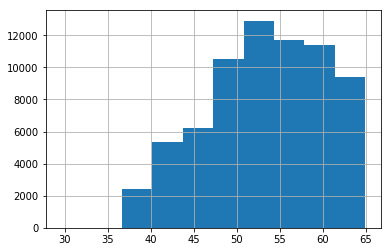

In [18]:
data.age_year.hist()

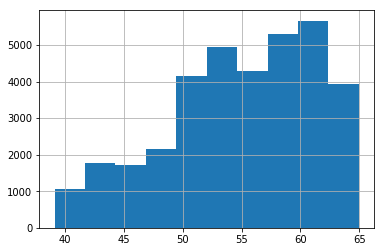

In [19]:
data[data.cardio == 1]['age_year'].hist()

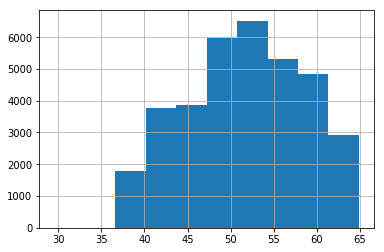

In [20]:
data[data.cardio == 0]['age_year'].hist()

In [21]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [26]:
data[data.gender == 1]['weight'].mean()

72.56560509554139

In [27]:
data[data.gender == 2]['weight'].mean()

77.25730690641602

In [30]:
data[data.cardio == 0]['gender'].value_counts()

1    22914
2    12107
Name: gender, dtype: int64

In [31]:
pd.crosstab(data['gender'], data['cardio'])

cardio,0,1
gender,,
1,22914,22616
2,12107,12363


In [32]:
data[data['weight'] < 40]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
id,,,,,,,,,,,,,
5306,15400,1,120,30.00,110,70,1,1,0,0,1,0,42.191781
8226,17663,1,151,37.00,120,80,1,1,0,0,1,0,48.391781
14908,22007,1,162,38.00,100,70,1,1,0,0,1,0,60.293151
15182,21669,1,153,37.00,150,80,3,3,0,0,1,1,59.367123
16963,17512,1,157,39.00,90,70,1,1,0,0,1,0,47.978082
21040,22663,1,143,34.00,100,70,1,1,0,0,1,0,62.090411
23318,21872,1,165,35.00,100,70,1,1,0,0,1,0,59.923288
24167,17272,2,170,31.00,150,90,2,2,0,0,1,1,47.320548
26503,18140,1,160,30.00,120,80,1,1,0,0,1,1,49.698630


In [34]:
data[data['height'] < 100]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
id,,,,,,,,,,,,,
309,21800,2,76,55.0,120,80,1,1,0,0,1,0,59.726027
10843,14661,2,70,72.0,120,8,1,1,0,0,1,0,40.167123
11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,48.345205
18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,53.682192
18928,22456,2,71,68.0,120,80,3,1,0,0,1,0,61.523288
20459,22005,1,67,57.0,120,90,1,1,0,0,1,1,60.287671
21686,15812,1,70,68.0,120,80,1,1,0,0,0,0,43.320548
23859,19680,2,74,98.0,140,90,1,1,0,0,1,1,53.917808
24690,17530,1,98,45.0,12,80,1,1,0,0,1,0,48.027397


In [35]:
data['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [38]:
data[data['ap_hi'] < 100].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
id,,,,,,,,,,,,,
71,17407,1,171,76.0,90,60,1,2,0,0,1,0,47.690411
255,22527,1,165,67.0,90,60,1,1,0,0,1,0,61.717808
288,18169,2,172,62.0,80,70,1,1,0,0,1,0,49.778082
491,16021,1,156,60.0,90,60,1,1,0,0,1,0,43.893151
543,19517,1,147,41.0,80,50,1,1,0,0,1,0,53.471233


In [37]:
pd.crosstab(data['cholesterol'], data['cardio'])

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


In [43]:
pd.crosstab(data['alco'], data['cardio'])

cardio,0,1
alco,,
0,33080,33156
1,1941,1823


In [45]:
pd.crosstab(data['smoke'], data['cardio'])

cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


In [46]:
pd.crosstab(data['active'], data['cardio'])

cardio,0,1
active,,
0,6378,7361
1,28643,27618
